# **CSY3025 Artificial Intelligence Techniques**
## **Assignment 2 – Image Classification using Deep Learning**

In supermarkets, customers often need to manually select fruit and
vegetables at the self-checkout as shown in the image below.

You are asked to join a team of engineers to develop a solution to automate the process of fruit/vegetable selection. A customer would place one type of fruit/vegetable at a time in a designated area before an overhead camera takes an image. Your task is to develop an image classifier that names the item in the image (from known categories). Your classifier needs to recognise **5 different fruit/vegetables** of your choice.

To complete the task, you must study the problem space, collect image dataset, train a deep learning classifier, and use appropriate method to showcase/visualise the performance of your classifier.

### **The deliverables of the assignments include:**
1. A working deep learning model implemented using TensorFlow
and Python. You must submit a Python notebook file (.ipynb) with all outputs saved.
 

2. A report that includes but not limited to the following sections:
*   **a. Cover page**
*    i. [optional] If your file size is larger than what’s permitted by the Turnitin submission point, then include a download link to your dataset (one drive, github, etc.)
*    ii. A link to a 5-minute demo video (e.g., screen recording) that walks through your design/implementation
*   **b. Introduction**
*   **c. Problem analysis and background research**
*   **d. Building deep learning network (explain how you make
choices at each following step)**
*   i. Dataset
*   ii. Network (structure, loss function, optimiser, etc.)
*   iii. Training and evaluation
*   iv. Testing
*   **e. Summary of additional features (if applies)**
*   **f. Discussions and conclusions**
*   i. Lessons learned
*   ii. Limitations
*   **g. Reference**

### **The marking will be based on:**
The marking will be based on:
1. 20% Problem analysis and background research
(demonstrate your general knowledge of deep learning and the
application scenario)
2. 30% Design (Architectural design of your application,
construction of dataset, test plans, etc. including additional features such as extra categories, exceptional model performance, user interface, etc.)
3. 40% Implementation (completion of the model, reasonable performance, and additional features)
4. 10% Report quality (quality of technical writing)

In [1]:
# Imports
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
import keras_preprocessing
from keras_preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import keras
from keras import backend as K

Using TensorFlow backend.


In [2]:
# Unzip fruits folder
!unzip -q '/content/drive/My Drive/fruits-5.zip'

In [3]:
# GDRIVEPATH='/content/fruits-360_dataset/fruits-360'
GDRIVEPATH='/content/fruits-360-dataset/fruits-360'

In [4]:
# Base directory variable
base_dir = GDRIVEPATH

# Directories
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Training
train_apple_dir = os.path.join(train_dir, 'apple')
train_banana_dir = os.path.join(train_dir, 'banana')
train_cherry_dir = os.path.join(train_dir, 'cherry')
train_grape_dir = os.path.join(train_dir, 'grape')
train_peach_dir = os.path.join(train_dir, 'peach')

# Validation
validation_apple_dir = os.path.join(validation_dir, 'apple')
validation_banana_dir = os.path.join(validation_dir, 'banana')
validation_cherry_dir = os.path.join(validation_dir, 'cherry')
validation_grape_dir = os.path.join(validation_dir, 'grape')
validation_peach_dir = os.path.join(validation_dir, 'peach')

# Test
test_apple_dir = os.path.join(test_dir, 'apple')
test_banana_dir = os.path.join(test_dir, 'banana')
test_cherry_dir = os.path.join(test_dir, 'cherry')
test_grape_dir = os.path.join(test_dir, 'grape')
test_peach_dir = os.path.join(test_dir, 'peach')


In [5]:
# Print number of images to verify training contents
print('total training apple images:', len(os.listdir(train_apple_dir)))
print('total training banana images:', len(os.listdir(train_banana_dir)))
print('total training cherry images:', len(os.listdir(train_cherry_dir)))
print('total training grape images:', len(os.listdir(train_grape_dir)))
print('total training peach images:', len(os.listdir(train_peach_dir)))

total training apple images: 493
total training banana images: 491
total training cherry images: 493
total training grape images: 985
total training peach images: 493


In [6]:
# Print first 10 images from directories to verify contents

apple_train_dir_names = os.listdir(train_apple_dir)
apple_validation_dir_names = os.listdir(validation_apple_dir)
apple_test_dir_names = os.listdir(test_apple_dir)

print('Training: ', apple_train_dir_names[:10])
print('Validation: ',apple_validation_dir_names[:10])
print('Test: ',apple_test_dir_names[:10])

Training:  ['319_100.jpg', '274_100.jpg', 'r_119_100.jpg', '175_100.jpg', '241_100.jpg', '195_100.jpg', '185_100.jpg', '300_100.jpg', '258_100.jpg', '232_100.jpg']
Validation:  ['122_100.jpg', '173_100.jpg', '31_100.jpg', '12_100.jpg', '108_100.jpg', '26_100.jpg', '160_100.jpg', '158_100.jpg', '138_100.jpg', '128_100.jpg']
Test:  ['r_61_100.jpg', '97_100.jpg', 'r_76_100.jpg', '44_100.jpg', '54_100.jpg', '63_100.jpg', '69_100.jpg', '50_100.jpg', '66_100.jpg', 'r_52_100.jpg']


# Training model

In [7]:
# Building the network
from keras import layers
from keras import models

model = models.Sequential()
# First
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
# Second
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# Third
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# Fourth
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# Fifth
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# Flatten and Dropout
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
# 512 neurons in hidden layer
model.add(layers.Dense(512, activation='relu'))
# Output 5 categories
model.add(layers.Dense(5, activation='softmax'))


In [8]:
# Summarise model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [9]:
# Selecting categorical_crossentropy as a loss function and RMSprop optimizer
# Compile model
from keras import optimizers

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])


In [10]:
# Data Augmentation to prevent overfitting
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20)

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20)


Found 2950 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [11]:
# Print databatch, labels and train generator
for data_batch, labels_batch in train_generator:
     print('data batch shape:', data_batch.shape)
     print('labels batch shape:', labels_batch.shape)
     break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 5)


# Training

In [12]:
# Training
history = model.fit_generator(
      train_generator,
      steps_per_epoch=30,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/15
30/30 [==============================] - 41s 1s/step - loss: 1.6073 - acc: 0.4150 - val_loss: 1.1115 - val_acc: 0.4140
Epoch 2/15
30/30 [==============================] - 38s 1s/step - loss: 1.0729 - acc: 0.5966 - val_loss: 0.4729 - val_acc: 0.8000
Epoch 3/15
30/30 [==============================] - 39s 1s/step - loss: 0.4540 - acc: 0.7733 - val_loss: 0.2965 - val_acc: 0.8000
Epoch 4/15
30/30 [==============================] - 39s 1s/step - loss: 0.3490 - acc: 0.7933 - val_loss: 0.3471 - val_acc: 0.8500
Epoch 5/15
30/30 [==============================] - 39s 1s/step - loss: 0.3013 - acc: 0.8267 - val_loss: 0.3555 - val_acc: 0.8000
Epoch 6/15
30/30 [==============================] - 39s 1s/step - loss: 0.2840 - acc: 0.8433 - val_loss: 0.3631 - val_acc: 0.8000
Epoch 7/15
30/30 [==============================] - 38s 1s/step - loss: 0.3021 - acc: 0.8593 - val_loss: 0.1510 - val_acc: 1.0000
Epoch 8/15
30/30 [==============================] - 39s 1s/step - loss: 0.1746 - acc: 0.93

In [13]:
# Saving the trained model
model.save(GDRIVEPATH+'fruits_trained.h5')

# Evaluation

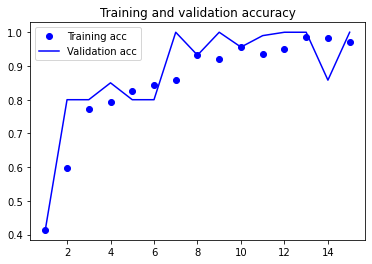

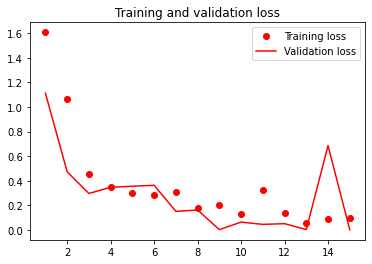

In [14]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [15]:
# Importing and validating the new model
model_dir = '/content/fruits-360-dataset/fruits-360fruits_trained.h5'

# Loading the h5 file
fruit_model = tf.keras.models.load_model(
    model_dir,
    custom_objects=None,
    compile=True
)

In [16]:
# Evaluation of the model
loss,acc = fruit_model.evaluate(validation_generator, verbose=2)
print('Restored model, Accuracy: {:5.2f}%'.format(100*acc))

25/25 - 5s - loss: 2.0277e-04 - acc: 1.0000
Restored model, Accuracy: 100.00%


# Prediction


[Forked from deelpizard - YouTube](https://www.youtube.com/watch?v=bfQBPNDy5EM)



In [17]:
# Doesn't work
test_batches = ImageDataGenerator().flow_from_directory(test_dir, target_size=(150, 150), classes=['apple', 'banana', 'cherry', 'grape', 'peach'], batch_size=30)

test_imgs, test_labels = next(test_batches)
# plt.plot(test_imgs, titles=test_labels)


Found 986 images belonging to 5 classes.


In [18]:
# Predicting model
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

predictions

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [19]:
# Testing accuracy
test_loss, test_acc = model.evaluate(test_imgs, test_labels)

test_acc

30/30 [==============================] - 0s 11ms/step


0.5

# Visualising the covnet learning

(1, 150, 150, 3)


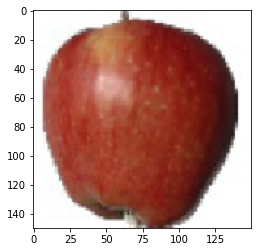

In [47]:
img_path = '/content/fruits-360-dataset/fruits-360/train/apple/100_100.jpg'

from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

#Its shape is (1, 150, 150, 3)
print(img_tensor.shape)

# Display image
plt.imshow(img)

In [51]:
from keras import models

layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)


In [ ]:
activations = activation_model.predict(img_tensor)

In [53]:
first_layer_activation = activations[0]

In [54]:
print(first_layer_activation.shape)

(1, 148, 148, 32)


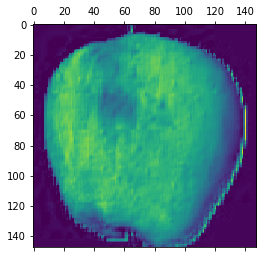

In [55]:
import matplotlib.pyplot as plt

plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

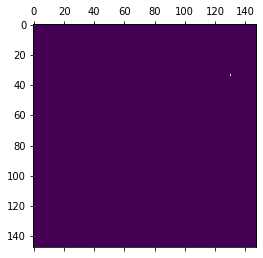

In [56]:
plt.matshow(first_layer_activation[0, :, :, 6], cmap='viridis')

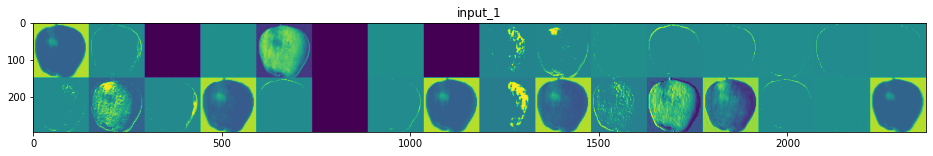

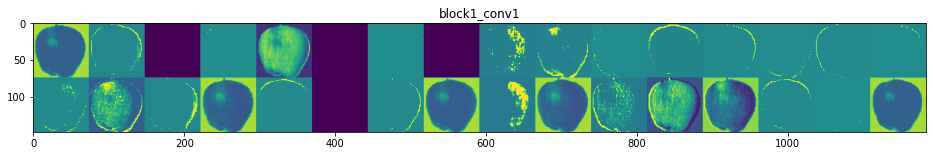

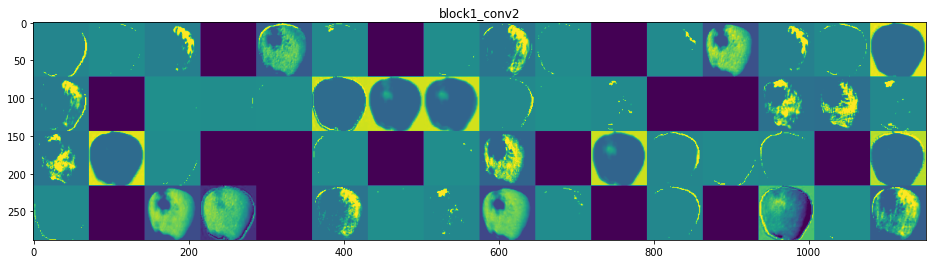

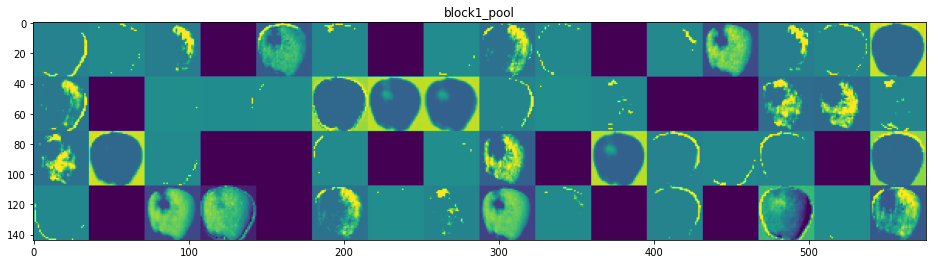

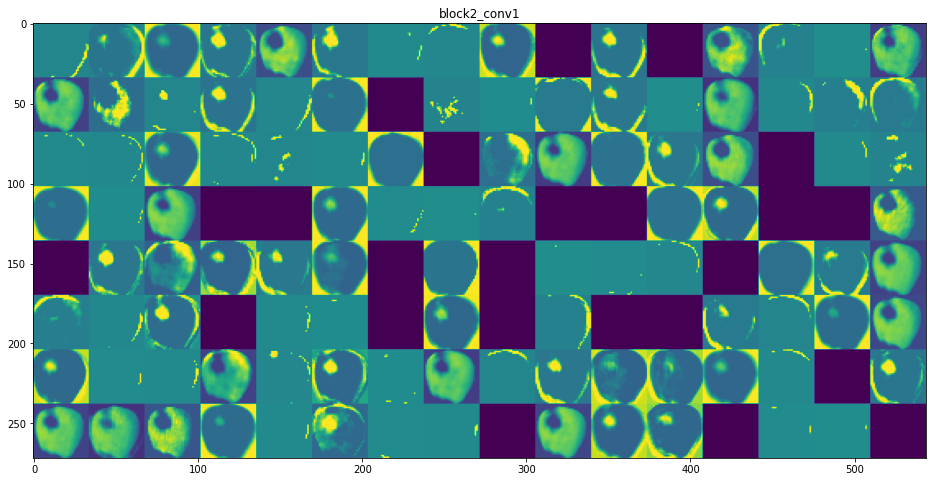

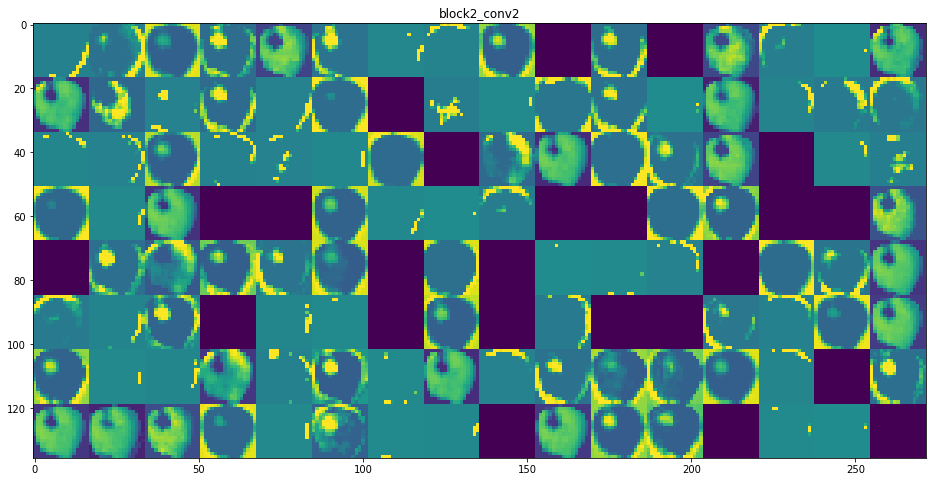

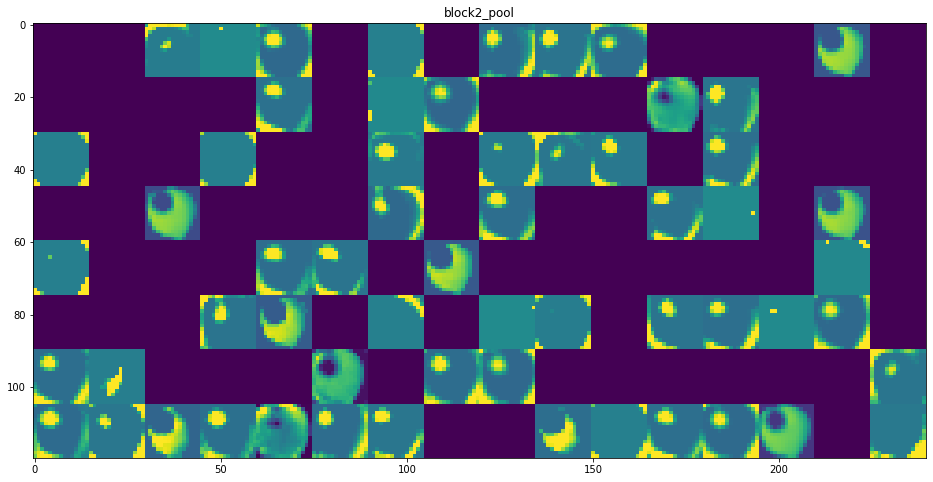

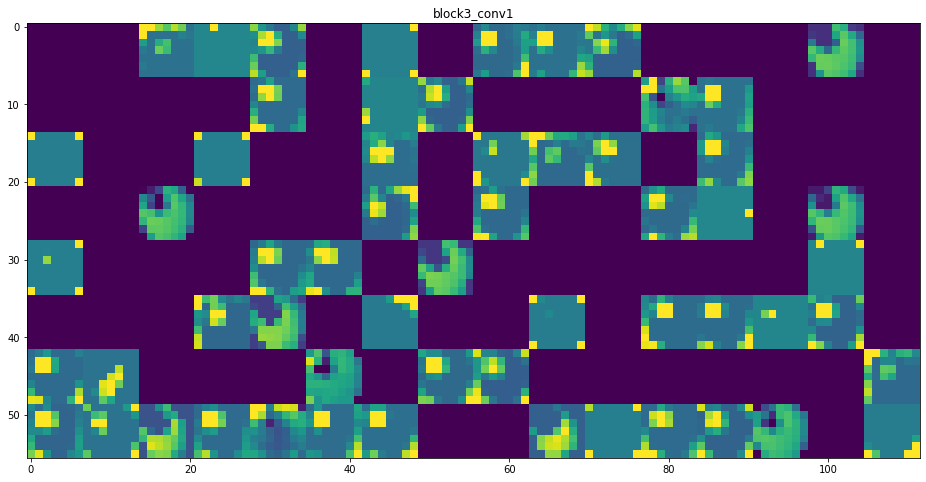

In [57]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]

    size = layer_activation.shape[1]

    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')



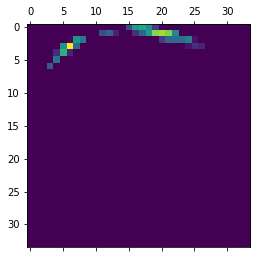

In [58]:
plt.matshow(activations[4][0, :, :, 7], cmap='viridis')

In [59]:
from keras.applications.vgg16 import VGG16

model = VGG16(weights='imagenet')

In [60]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

img_path = '/content/fruits-360-dataset/fruits-360/train/apple/100_100.jpg'

img = image.load_img(img_path, target_size=(224, 224))

x = image.img_to_array(img)

x = np.expand_dims(x, axis=0)

x = preprocess_input(x)


In [61]:
preds = model.predict(x)

In [62]:
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n07768694', 'pomegranate', 0.4639241), ('n12768682', 'buckeye', 0.2009852), ('n12267677', 'acorn', 0.08207886)]


In [63]:
np.argmax(preds[0])

957